
# Project: Fun with TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li style="margin-left: 20px;"><a href="#peek">Taking a peek at the table!</a></li>
<li style="margin-left: 20px;"><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li style="margin-left: 20px;"><a href="#eda">Research Q: Relationship between year of release and title length</a></li>
<li style="margin-left: 20px;"><a href="#q2">Research Q: Relationship between month of release and voting avg</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

We'll be taking a closer look at the TMDb movie data which is comprised of a list of around 5000 movies and data relating to them. A brief description of the data columns within this dataset:

| Fields | Description  |
|------|------|
|   imdb_id  | imdb database unique id |
|   budget  | Production budget in USD |
|   revenue  | Revenue in USD |
|   original_title  | Original title for the film |
|   cast  | Cast |
|   homepage  | homepage |
|   director  | Director of the movie |
|   tagline  | tagline for the movie |
|   keywords  | keywords |
|   overview  | Synopsis for the movie |
|   runtime  | Running time in mins |
|   genres  | Genres for the film |
|   production_companies  | Production Companies |
|   release_date  | Release date of the movie |
|   vote_count  | Number of votes |
|   vote_average  | Average score for the movie based on votes |
|   release_year  | Release year of the movie |
|   budget_adj  | Budget (USD) adjusted for inflation in terms of 2010 dollars |
|   revenue_adj  | Revenue (USD) adjusted for inflation in terms of 2010 dollars |							


This report will take a look at the relationship between the year of release and title length for the past 40 years in our dataset as well as the relationship between month of release and voting average for our entire data.

### Import all necessary packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

% matplotlib inline

# Pandas version
pd.__version__

'0.20.3'

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
## Load up our files and take a look at the columns within our dataset

df_movies = pd.read_csv('./data/tmdb-movies.csv')
df_movies.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

<a id='peek'></a>
### Taking a peek at the table!  (╯°□°）╯︵ ┻━┻

In [3]:
# How many rows, columns do we have?
df_movies.shape

(10866, 21)

In [4]:
# A look at the first 5 entries in our dataset
df_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
# This should tell us the min and max years of our data, which looks to range from 1960-2015 from the result
df_movies['release_year'].describe()

count    10866.000000
mean      2001.322658
std         12.812941
min       1960.000000
25%       1995.000000
50%       2006.000000
75%       2011.000000
max       2015.000000
Name: release_year, dtype: float64

### Datatypes in our data!

In [6]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

#### Looks like some of our data is missing, we can skip cleaning up these columns as they won't be necessary for our reesearch questions

<a id='cleaning'></a>

### Data Cleaning!

In this section we will be doing the following: 
*   Checking for null values
*   Removing unnecessary duplicates in our data 
*   Removing columns that we will not require for our analysis

#### Our last step to look at the datatypes already informed us that there's no null values present so we'll skip to the next step!

### Check for and remove duplicates   (⌐■_■)

In [7]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df_movies[df_movies.duplicated() == True]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


#### We have one duplicated item, let's take a brief look at it before we drop it out of our pandas dataframe.</p>

In [8]:
df_movies.query('imdb_id == "tt0411951"')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


#### Time to take out this duplicate and ensure that it's gone

In [9]:
df_movies.drop_duplicates(inplace=True)
df_movies.duplicated().unique()

array([False], dtype=bool)

In [10]:
df_movies.shape

(10865, 21)

### Drop Columns

We will not be using these columns in the following analysis so we can drop them and confirm they are no longer present

In [11]:
df_movies.drop(['tagline','homepage'], axis=1, inplace=True)
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 19 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              10865 non-null float64
revenue_adj             10865 non-null float64
dtypes: float64(4), i

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question: For the past 40 years in our dataset (1976-2015), how has the average length of a movie title changed?

Taking a quick look at our new dataframe, with just the title and release_year columns we require.

In [12]:
#df_avglen = df_movies.loc[:, ['original_title','release_year']] ## alternate way
df_avglen = df_movies[['original_title','release_year']].copy()
df_avglen.sort_values(by='release_year', inplace=True)
df_avglen.head()

,original_title,release_year
10172,Exodus,1960
10141,Psycho,1960
10142,The Magnificent Seven,1960
10143,Spartacus,1960
10144,The Apartment,1960


In [13]:
df_avglen.rename(columns={'original_title':'title', 'release_year':'year'},inplace=True)

In [14]:
df_avglen.head()

,title,year
10172,Exodus,1960
10141,Psycho,1960
10142,The Magnificent Seven,1960
10143,Spartacus,1960
10144,The Apartment,1960


#### Our title length can be added into a new column so let's create that. For now, we'll just copy the values from the title.

In [15]:
df_avglen['title_length'] = df_avglen['title']

In [16]:
df_avglen.head()

,title,year,title_length
10172,Exodus,1960,Exodus
10141,Psycho,1960,Psycho
10142,The Magnificent Seven,1960,The Magnificent Seven
10143,Spartacus,1960,Spartacus
10144,The Apartment,1960,The Apartment


#### Determine the length of each title best as we can given this data. Since most movie titles would just have spaces in between each word, and colons are usually attached, we can use a simple split with the space as the argument. The len of our split should give us the number of words in the title.

In [17]:
df_avglen['title_length'] = df_avglen['title_length'].apply(lambda x: str(len(x.split(' '))))
df_avglen['title_length']= df_avglen.title_length.astype(int);
#df_avglen.dtypes

#### See if our data came out right

In [18]:
df_avglen.head()

,title,year,title_length
10172,Exodus,1960,1
10141,Psycho,1960,1
10142,The Magnificent Seven,1960,3
10143,Spartacus,1960,1
10144,The Apartment,1960,2


In [19]:
df_avglen['title_length'].describe()

count    10865.000000
mean         2.857156
std          1.708731
min          1.000000
25%          2.000000
50%          2.000000
75%          4.000000
max         20.000000
Name: title_length, dtype: float64

#### It seems our longest title length is 20, let's just confirm there's nothing fishy going on here :o

In [20]:
df_avglen.sort_values(by='title_length',ascending=False).head()

,title,year,title_length
10692,Those Magnificent Men in Their Flying Machines...,1965,20
7751,Chacun son cinema ou Ce petit coup au coeur qu...,2007,18
5663,30 Nights of Paranormal Activity With the Devi...,2013,15
4068,Babylon 5: The Legend of the Rangers - To Live...,2002,14
8508,Don't Be a Menace to South Central While Drink...,1996,14


In [21]:
df_avglen.describe()

,year,title_length
count,10865.000000,10865.000000
mean,2001.321859,2.857156
std,12.813260,1.708731
min,1960.000000,1.000000
25%,1995.000000,2.000000
50%,2006.000000,2.000000
75%,2011.000000,4.000000
max,2015.000000,20.000000


#### Since our max year is 2015, we will look at 1976-2015 (40 years, including 2015). Let's add up our yearly mean values into a list

In [22]:
title_len_40yrs = []
year_list = []
year = 1976

# Let's get the values into a list to plot later
for n in range(40):
    year_list.append(year)
    year_title_len = df_avglen.query('year == {}'.format(str(year)))['title_length'].mean()
    title_len_40yrs.append(year_title_len)
    #print ("{} title length: {}".format(year,year_title_len))
    year += 1

In [23]:
## The average length in the last 40 years
print(title_len_40yrs)

[3.0, 2.8245614035087718, 2.7846153846153845, 2.5964912280701755, 2.4230769230769229, 2.6585365853658538, 2.7901234567901234, 2.5125000000000002, 2.8380952380952382, 2.9541284403669725, 2.6859504132231407, 2.8639999999999999, 3.0689655172413794, 3.1094890510948905, 2.8333333333333335, 2.9022556390977443, 2.5413533834586466, 2.904494382022472, 2.7608695652173911, 2.8457142857142856, 2.6911764705882355, 2.5520833333333335, 2.7999999999999998, 2.9107142857142856, 2.8898678414096914, 2.7727272727272729, 2.744360902255639, 3.0, 2.9511400651465798, 2.8901098901098901, 2.7720588235294117, 2.9200913242009134, 2.913306451612903, 2.8893058161350846, 2.8916155419222904, 2.9685185185185183, 2.8622448979591835, 2.836115326251897, 2.8242857142857143, 2.7138314785373607]


### Plotting time! ◔ ⌣ ◔

-


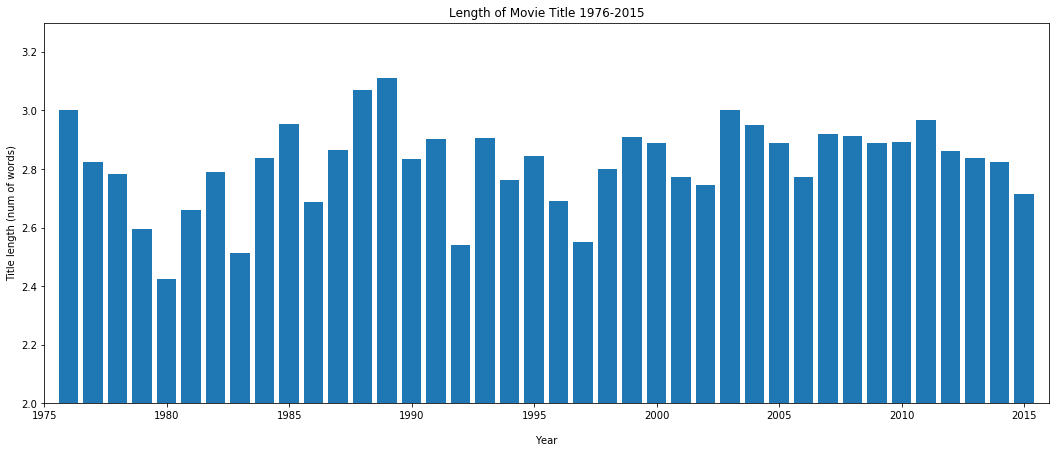

In [24]:
plt.figure(figsize=(18,7))
plt.bar(year_list, title_len_40yrs, width=.8)
plt.title("Length of Movie Title 1976-2015")
plt.ylim(2,3.3)
plt.xlim(1975,2016)
plt.ylabel('Title length (num of words)')
plt.xlabel('\nYear')
print ('-')

<a id='q2'></a>
### Research Question: Relationship between month of release and voting avg for all movies

In [25]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

df_q2 = df_movies[['release_date','vote_average']].copy()
df_q2.head()

,release_date,vote_average
0,6/9/15,6.5
1,5/13/15,7.1
2,3/18/15,6.3
3,12/15/15,7.5
4,4/1/15,7.3


#### Since we only care about the month of the release date, we'll take a few steps to strip down the data to just that instead of the full date.

In [26]:
from datetime import datetime

df_q2.dtypes

release_date     object
vote_average    float64
dtype: object

#### Write up a short function which will help us convert our date values to month values.

In [27]:
def month_converter(some_date):
      
    try:
        newdate = datetime.strptime(some_date,'%x')
        month = newdate.strftime('%B')
        month_digit = newdate.strftime('%m')
        return month
    
    except:
        print ('NaN')

In [28]:
# test out the function
month_converter('6/9/15')

'June'

#### Let's create a new column that will show the month of the release date!

In [29]:
df_q2['release_month']= df_q2['release_date'].apply(lambda x: month_converter(x))
df_q2.head()

,release_date,vote_average,release_month
0,6/9/15,6.5,June
1,5/13/15,7.1,May
2,3/18/15,6.3,March
3,12/15/15,7.5,December
4,4/1/15,7.3,April


#### The first digit of our release_date is the month and we are only dealing with that, so we can sort by that column.

In [30]:
df_q2.sort_values(by='release_date',inplace=True)
df_q2.head()

,release_date,vote_average,release_month
8865,1/1/00,6.1,January
8875,1/1/00,7.4,January
8839,1/1/00,8.5,January
8831,1/1/00,7.5,January
8824,1/1/00,6.9,January


In [31]:
#df_q2.plot
#plt.scatter(df_q2.release_month,df_q2.vote_average)
df_q2.dtypes

release_date      object
vote_average     float64
release_month     object
dtype: object

In [32]:
df_q2.release_month.unique()

array(['January', 'October', 'November', 'December', 'February', 'March',
       'April', 'May', 'June', 'July', 'August', 'September'], dtype=object)

#### Okay, it looks like our sorting didn't actually work because it used the 10/11/12 as the months following 1 (should have seen this coming, Python just sees the 1 and thinks it comes first). Let's get our mean for each month and we'll sort the values after.

In [33]:
vote_avg = df_q2.groupby('release_month',sort=False)['vote_average'].mean()
vote_avg

release_month
January      5.870620
October      5.959844
November     6.062654
December     6.189442
February     5.918524
March        5.928102
April        5.875533
May          5.967985
June         6.012092
July         5.928411
August       5.840087
September    6.068069
Name: vote_average, dtype: float64

#### Sorting time!

In [34]:
## A dictionary to hold values which we will use to sort
months = {"January":1,"February":2,"March":3,"April":4,"May":5,"June":6,"July":7,
          "August":8,"September":9,"October":10,"November":11,"December":12}

## New dictionary and a couple of lists
newdict = {}
xvalues, yvalues = [], []

## Let's go through the values in our Series above, and basically clone it into a dict
for n in vote_avg.index:
    newdict[n] = vote_avg[n]
print (newdict)

## Now that we have our data in a dict, we can add it back in an orderly fashion using keys from our months dictionary :)
for item in months.keys():
    xvalues.append(item)
    yvalues.append(newdict[item])
    
print ('\n')
print (xvalues,yvalues)

{'January': 5.8706202393906395, 'October': 5.9598438855160438, 'November': 6.0626535626535647, 'December': 6.1894416243654868, 'February': 5.9185238784370515, 'March': 5.9281021897810362, 'April': 5.8755332496863213, 'May': 5.9679851668726824, 'June': 6.012091898428058, 'July': 5.9284105131414266, 'August': 5.8400871459694983, 'September': 6.0680691209616962}


['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'] [5.8706202393906395, 5.9185238784370515, 5.9281021897810362, 5.8755332496863213, 5.9679851668726824, 6.012091898428058, 5.9284105131414266, 5.8400871459694983, 6.0680691209616962, 5.9598438855160438, 6.0626535626535647, 6.1894416243654868]


#### Now that we have the data we need, let's start plotting! :) A scatter plot or bar chart might work best, so let's do both to see how they look.

-


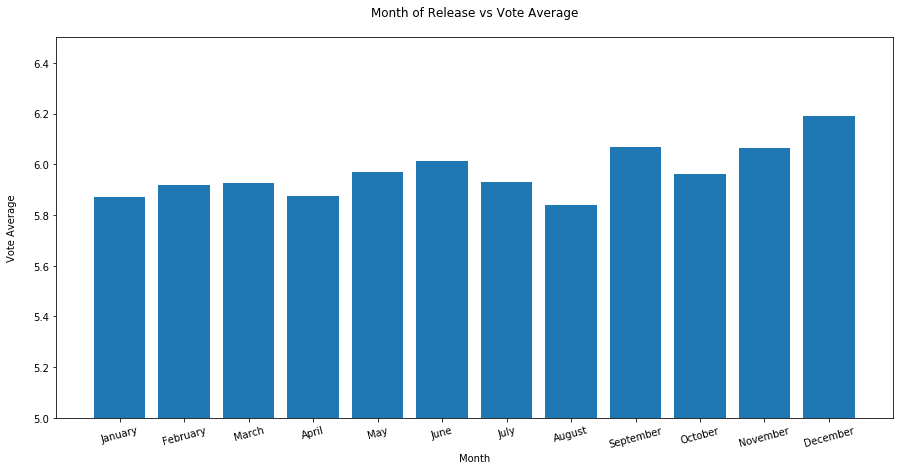

In [35]:
# bar chart
locators = np.arange(12)
plt.figure(figsize=(15,7))
plt.bar(locators,yvalues, width=0.8)
plt.xticks(locators, xvalues, rotation=15)
plt.ylim(5,6.5)
plt.xlabel('Month')
plt.ylabel('Vote Average\n')
plt.title('Month of Release vs Vote Average\n')
print ('-')

#### The values start at 0 but the lower limit for the y-axis has been set to 5 to view the data better (since all months satisfy the lower limit)

-


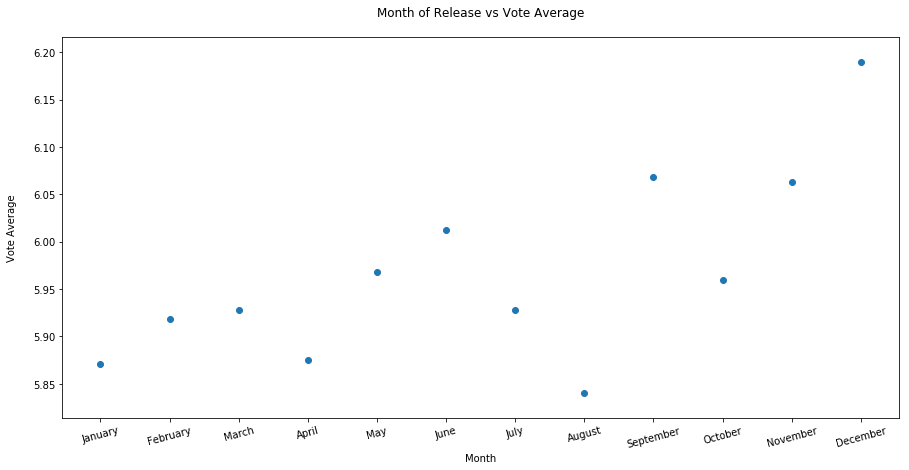

In [36]:
# Scatter plot
plt.figure(figsize=(15,7))
plt.scatter(locators,yvalues)
plt.xticks(locators, xvalues, rotation=15)
plt.xlabel('Month')
plt.ylabel('Vote Average\n')
plt.title('Month of Release vs Vote Average\n')
print ('-') #p.s. I'm only doing this to create some space between this block and the graph, \n takes up even more space

#### I think the scatterplot definitely is more readable in this case as it avoids the issue of setting ylimits in the bar graphs and makes some trends more apparent.

<a id='conclusions'></a>
## Conclusions


The analysis for our first research question demonstrates that there haven't been any monumental shifts to the average length of a title over the years, with almost all averages sitting between the 2-3 word length mark throughout 1976-2015. The last few years in the chart may seem to suggest that we're gradually moving towards smaller movie titles but that may not be the case at all as we see more and more franchise related properties in Hollywood (I'm looking at you, comic-book movies and unoriginal sequels!).

I suppose the data could be more accurate had we additional data on the titles, by removing digits where a sequel is implied.  Terminator 2, for example, would be 1 word instead of 2 as the digit only stands there to inform us about the chronological order of the movies (and how good James Cameron can be at sequels). Unfortunately, without that data specifically telling us which title is a sequel, manually overlooking each title or checking against some database would be the only two options (to avoid confusion with digits that are part of the title such as 'Furious 7' or 'Hitman: Agent 47'). In conclusion, ovie title lengths haven't had anything interesting to talk about in a long time. :)

Let's talk a bit about our second and possibly more interesting research question. The scatterplot strongly suggests that, on average, movies released towards the end of the year are generally better received in terms of quality. One of the factors resulting in this might be that a bunch of movies aiming for Oscar nominations (as well as Oscar bait movies) are often geared towards the end of the year in order to stay fresh in the minds of judges when the nominations are decided and also give the movies a potential box office boost. There also seems to be a pyramid-like shape around the summer months, which may be attributed to audience-pleasing summer blockbusters being dominant around that time and most mid-budget films choosing to shy away from those releases as they can have a negative financial impact on them. Another possibility of the films in May, June, and Setempber having a spike could be the fact that Cannes Film Festival and Toronto International Film Festival usually cover those release gaps. I suppose we can always filter out our data even further by only taking a look at the films which have a minimum number of votes but this would be debatable as there may be quite a few older hidden gems in there that could get wiped out.


### References:

- For getting me through that SettingwithCopyWarning!
https://www.dataquest.io/blog/settingwithcopywarning/